In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from wrangle import wrangle_data


In [3]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [4]:
# getting data
df, train, test = wrangle_data()

In [105]:
# resampling for every 6 months
train2 = train.resample('6M').mean()
df2 = df.resample('6M').mean()

In [106]:
# getting the target as y
y = df['diff']
y2 = df2['diff']

In [18]:
y.head()

2017-01-01    55.0
2017-02-01    50.0
2017-03-01    76.0
2017-04-01    80.0
2017-05-01    48.0
Name: diff, dtype: float64

## Histogram of our target variable

<AxesSubplot:ylabel='Frequency'>

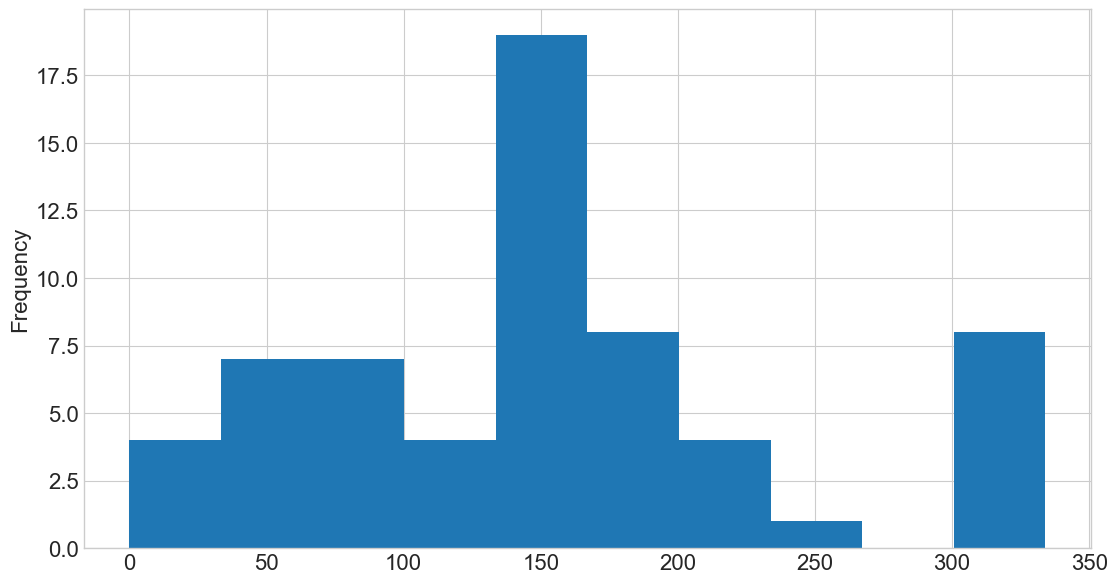

In [19]:
y.plot.hist()

#### Takeaways:
* There are often times where the median rental rates are the amount that people cna likely afford


#### Questions/Notes:
* What are the economic qualificaitons for individuals to get on the vouchers?
    * Understanding this will allow us to better understand if people can afford a 150 difference or higher 

## Average difference by time-period

[Text(0.5, 1.0, 'Average Differnce by 6 Month Period'),
 Text(0.5, 0, '6-Month-Interval'),
 Text(0, 0.5, 'Difference in Price')]

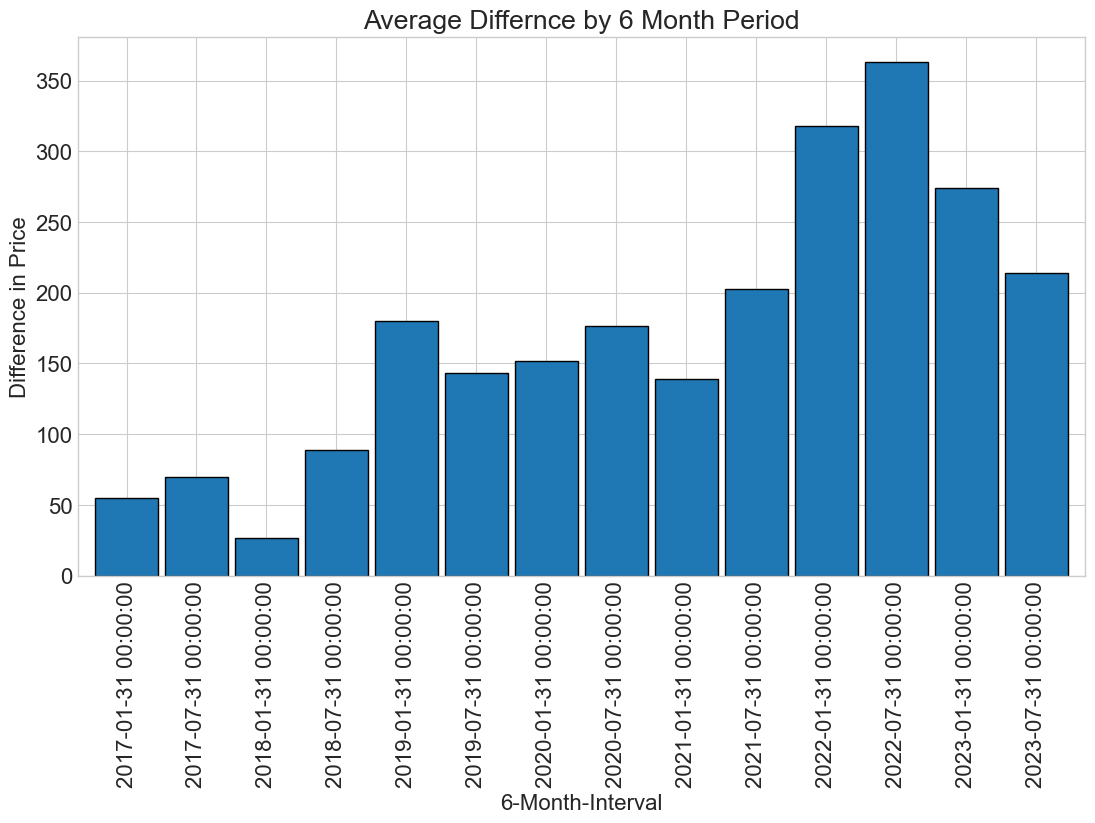

In [107]:
ax = y2.groupby(y2.index).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=90)
ax.set(title='Average Differnce by 6 Month Period', xlabel='6-Month-Interval', ylabel='Difference in Price')


In [62]:
y

2017-01-01     55.0
2017-02-01     50.0
2017-03-01     76.0
2017-04-01     80.0
2017-05-01     48.0
              ...  
2021-10-01    311.0
2021-11-01    319.0
2021-12-01    316.0
2022-01-01    310.0
2022-02-01    333.0
Name: diff, Length: 62, dtype: float64

<AxesSubplot:xlabel='month', ylabel='diff'>

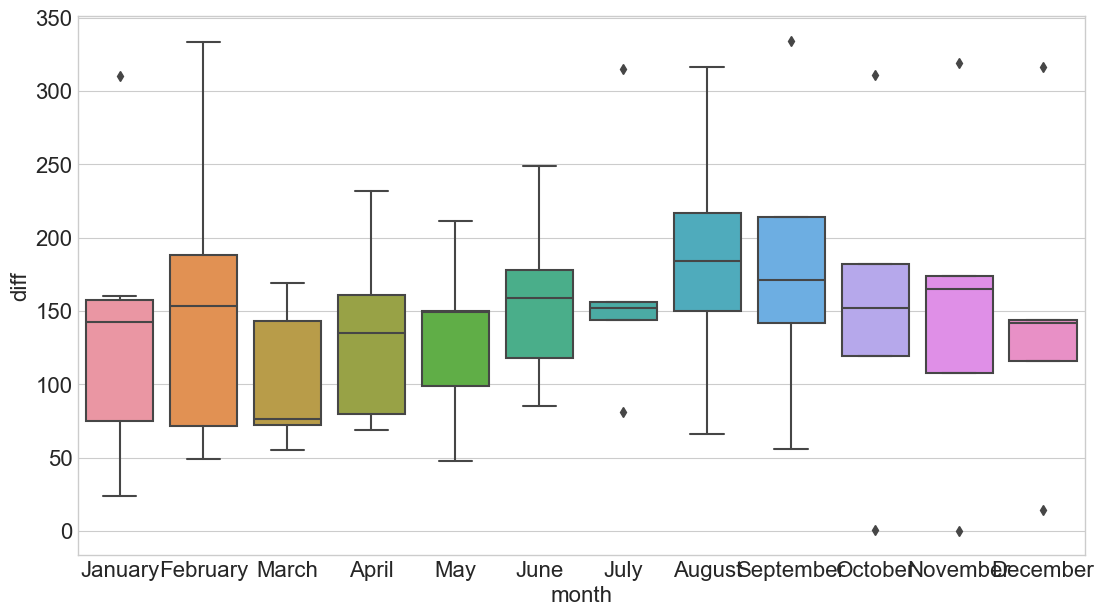

In [82]:
# establishing month
train['month'] = train.index.month_name()

# checking train
train

# box plot
sns.boxplot(data = train, x='month', y='diff')

## Visualize the target over time-period

(<AxesSubplot:>, <AxesSubplot:>)

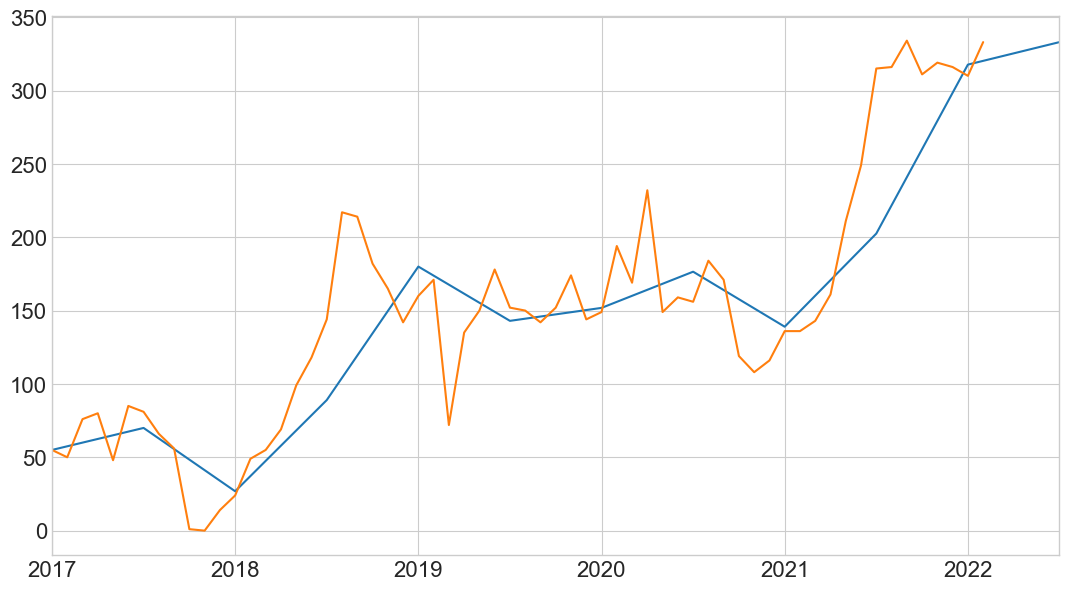

In [28]:
y2.plot(), y.plot()

## Visualize rolling average over time-period

<AxesSubplot:title={'center':'6 Month average'}>

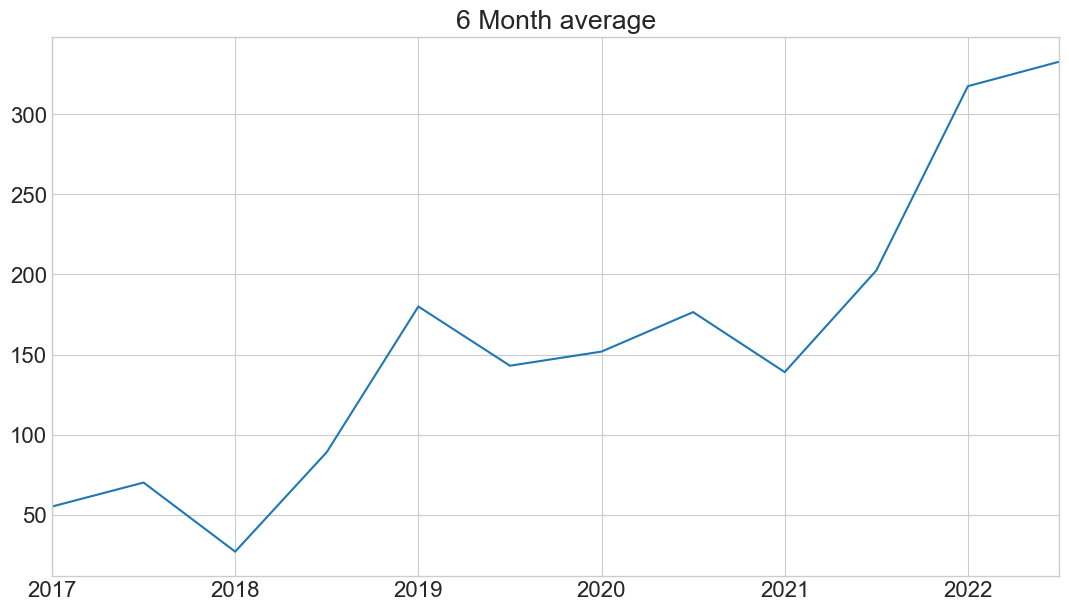

In [30]:
y.resample('6M').mean().plot(title='6 Month average')

## Visualize change over time-period

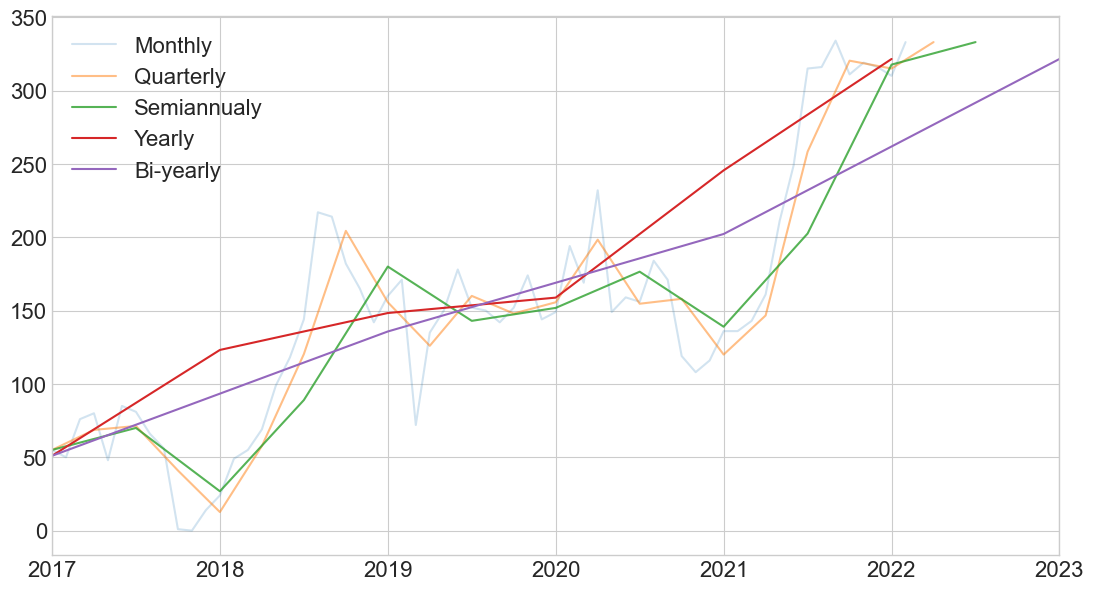

In [31]:
y.plot(alpha=.2, label='Monthly')
y.resample('3M').mean().plot(alpha=.5, label='Quarterly')
y.resample('6M').mean().plot(alpha=.8, label='Semiannualy')
y.resample('Y').mean().plot(label='Yearly')
y.resample('2Y').mean().plot(label='Bi-yearly')
plt.legend()


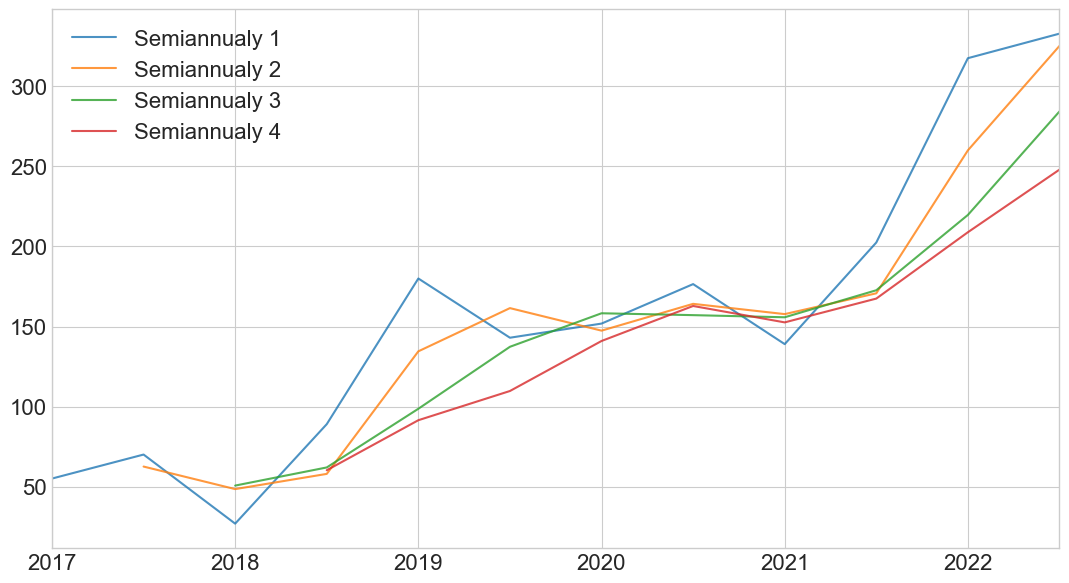

In [37]:
y.resample('6M').mean().rolling(1).mean().plot(alpha=.8, label='Semiannualy 1')
y.resample('6M').mean().rolling(2).mean().plot(alpha=.8, label='Semiannualy 2')
y.resample('6M').mean().rolling(3).mean().plot(alpha=.8, label='Semiannualy 3')
y.resample('6M').mean().rolling(4).mean().plot(alpha=.8, label='Semiannualy 4')
plt.legend()

#### Takeaways:
* There has been a clear increased in the difference between the FMR and the MMR with significant increases happening in two sections
    * The first - throughout 2018 there was a continual increase that beagin to stabilize in 2019.
    * The second, from 2021 to 2022, with signs of possible stabilization around the beginning of 2022, but this cannpt be confirmed.

#### Notes/Questions:
* I think it will be very useful to examine the zipcode related data. With the zipcode related data, we can possibly created a time series mapo that shows when people can afford certain zipcodes and when people can't affoprd certain zipcodes
* It would be nice to have the zipcodes labeled in 3 ways 'Good', 'Fair', 'Poor' based on information in each zipcode. This information will be based on things such as poverty, violence, school ratings, etc. 
* We also have the total amount of rentals in each zipcode with their price range, we may be able to also determine the percentages/likelihood of individuals being able to move to a certain area based ont he avaialbalility of units
* One consideration is whether or not an area accepts the HUD vouchers, there may be places that do. not accept HUD vouchers, which could limit ones aility to even move to a certsin zipcode if the voucher is not accepted
    * It may be useful to see if we can find a comprehensve list of places that accept the hud coucher and identify where an individual can move based on the hud accepting areas
 

## 

## Visualization to Explore Part 2:

### Seasonal plot comparing many of the time-periods

<AxesSubplot:title={'center':'Seasonal Plot'}>

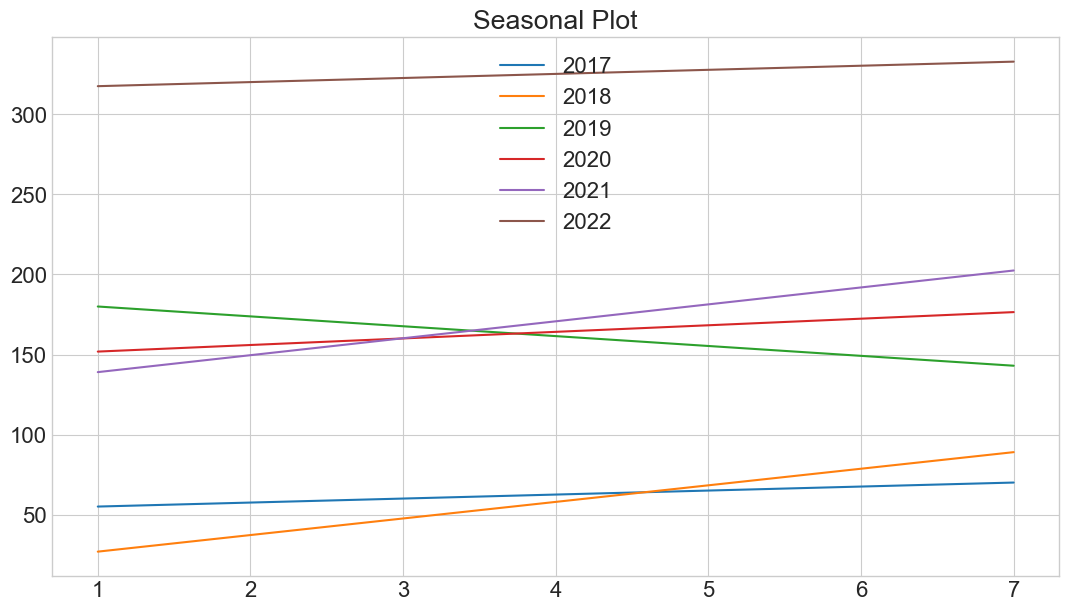

In [39]:
# .unstack turns an index level into columns
y2.groupby([y2.index.year, y2.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


<AxesSubplot:title={'center':'Seasonal Plot'}>

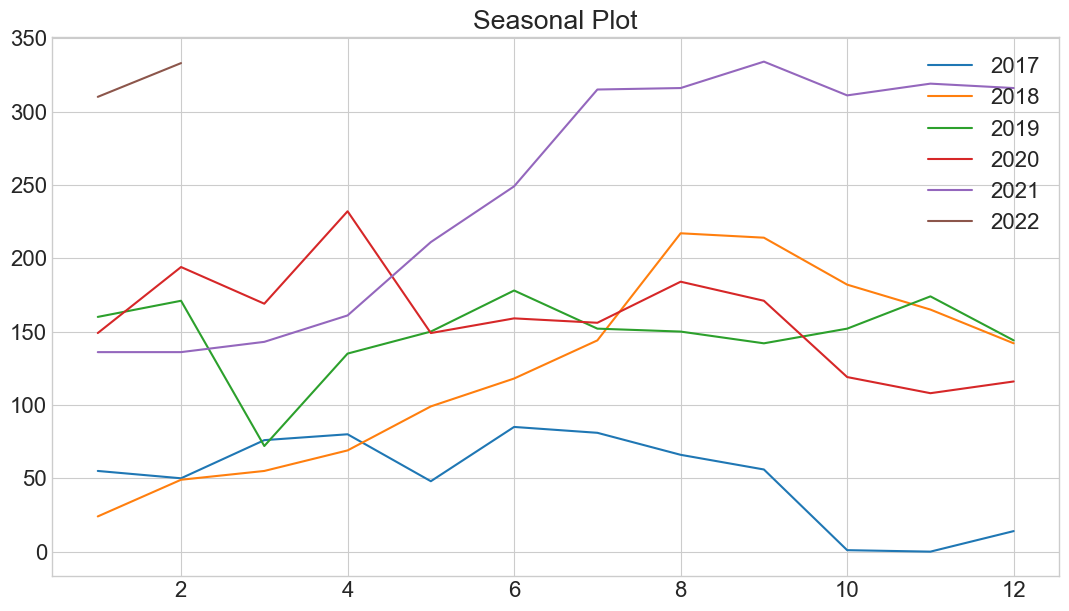

In [40]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


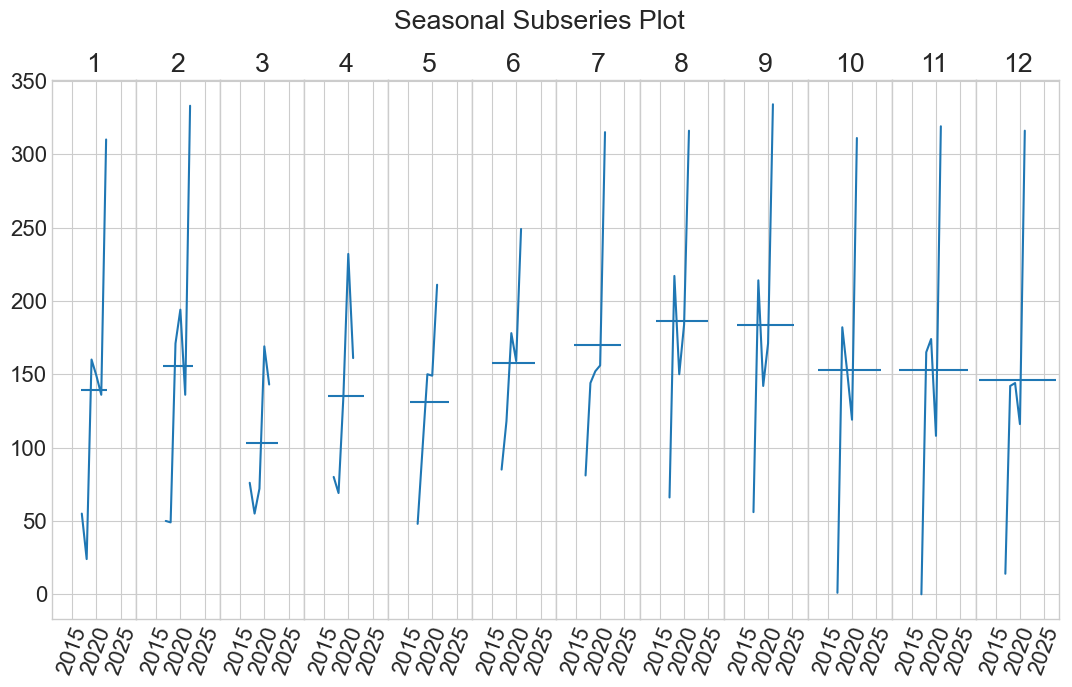

In [83]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack(0)

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iterrows()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
    ax.set_xticklabels([int(thing) for thing in ax.get_xticks()], rotation = 70)

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)


### Lag plots

Text(0.5, 1.0, 'Lag plot with lag=1')

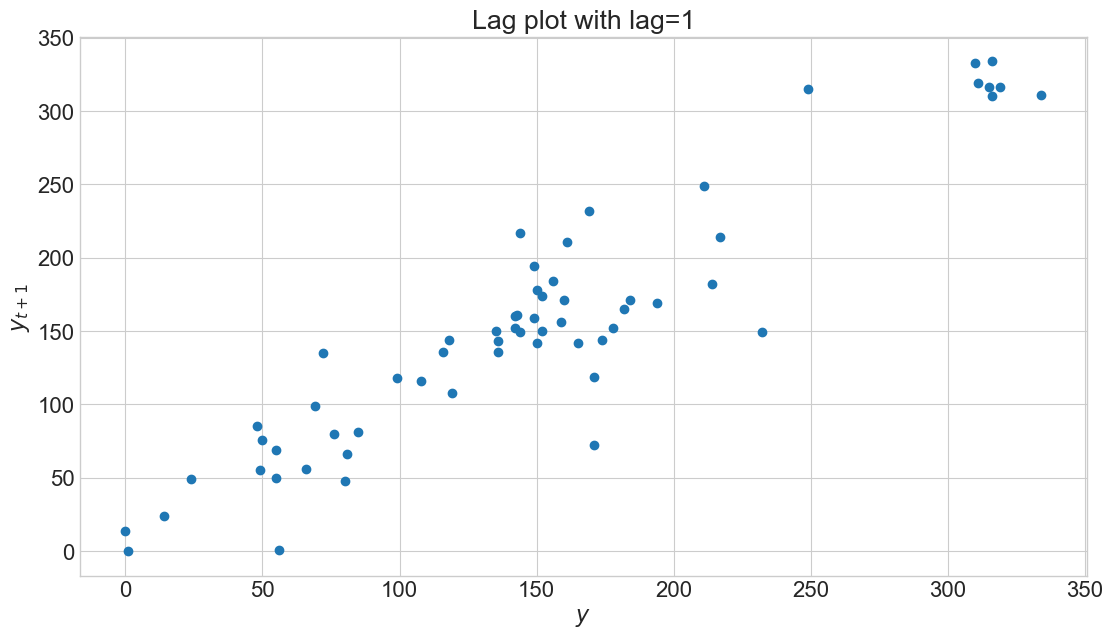

In [84]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

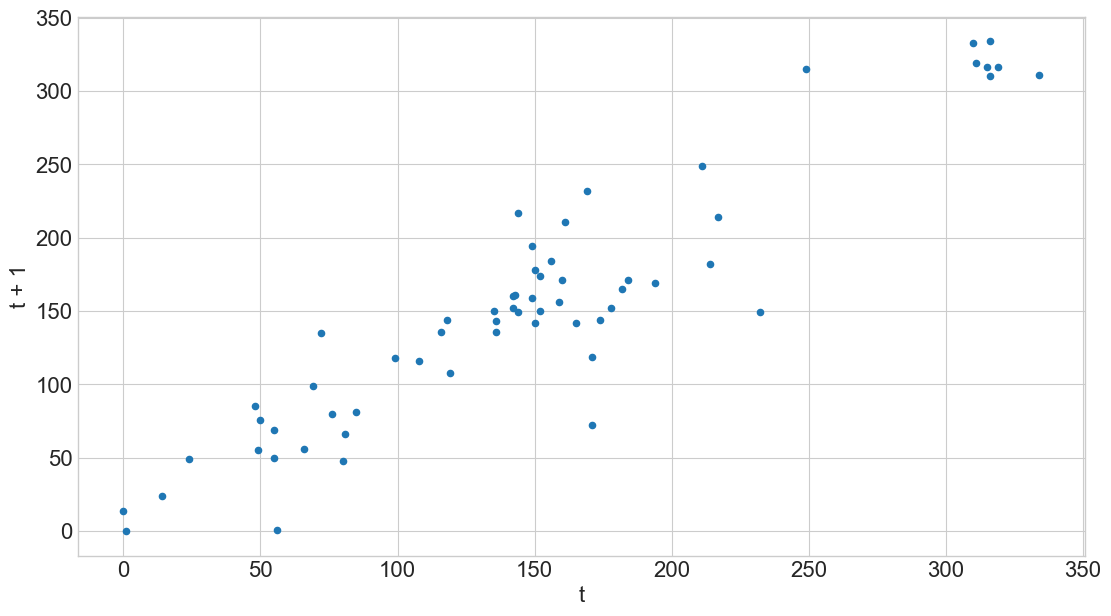

In [85]:
train['y(t + 1)'] = train['diff'].shift(-1)
ax = train.plot.scatter(x='diff', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')


,fmr,mmr,this_semi,y(t + 1),the_next_semi
2017-01-31,964.000000,1019.000000,55.000000,50.000000,70.000000
2017-07-31,964.000000,1034.000000,70.000000,72.666667,26.833333
2018-01-31,988.666667,1015.500000,26.833333,24.000000,89.000000
2018-07-31,1001.000000,1090.000000,89.000000,117.000000,180.000000
2019-01-31,1033.666667,1213.666667,180.000000,172.333333,143.000000
2019-07-31,1050.000000,1193.000000,143.000000,139.500000,151.833333
2020-01-31,1050.666667,1202.500000,151.833333,159.166667,176.500000
2020-07-31,1051.000000,1227.500000,176.500000,174.833333,139.000000
2021-01-31,1093.000000,1232.000000,139.000000,131.000000,202.500000
2021-07-31,1114.000000,1316.500000,202.500000,232.500000,317.666667


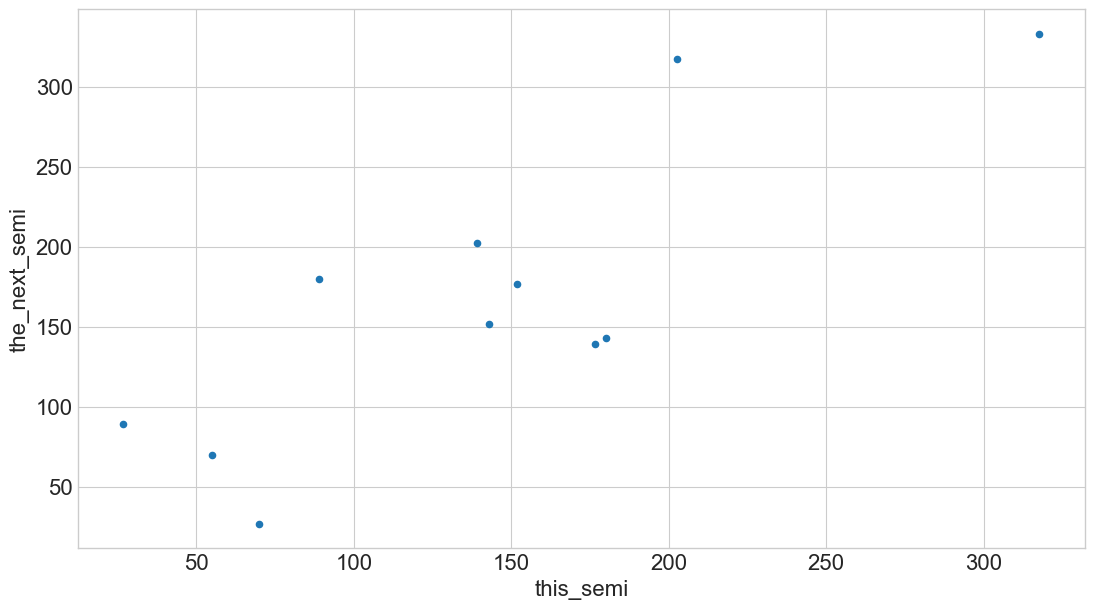

In [86]:
semi_annual = train.resample('6M').mean()
semi_annual['the_next_semi'] = semi_annual['diff'].shift(-1)
semi_annual = semi_annual.rename(columns={'diff': 'this_semi'})
semi_annual.plot.scatter(x='this_semi', y='the_next_semi')
semi_annual


In [ ]:
pd.plotting.lag_plot(train.temp.resample('W').mean(), lag=26)

##### Takeaways:
* There is a 100 dollar difference within the span of 6 months

##### Notes/Questions
* What are the qualifications to be on the HUD voucher?
* How often do individuals move who use the vouchers?

### Autocorrelation

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

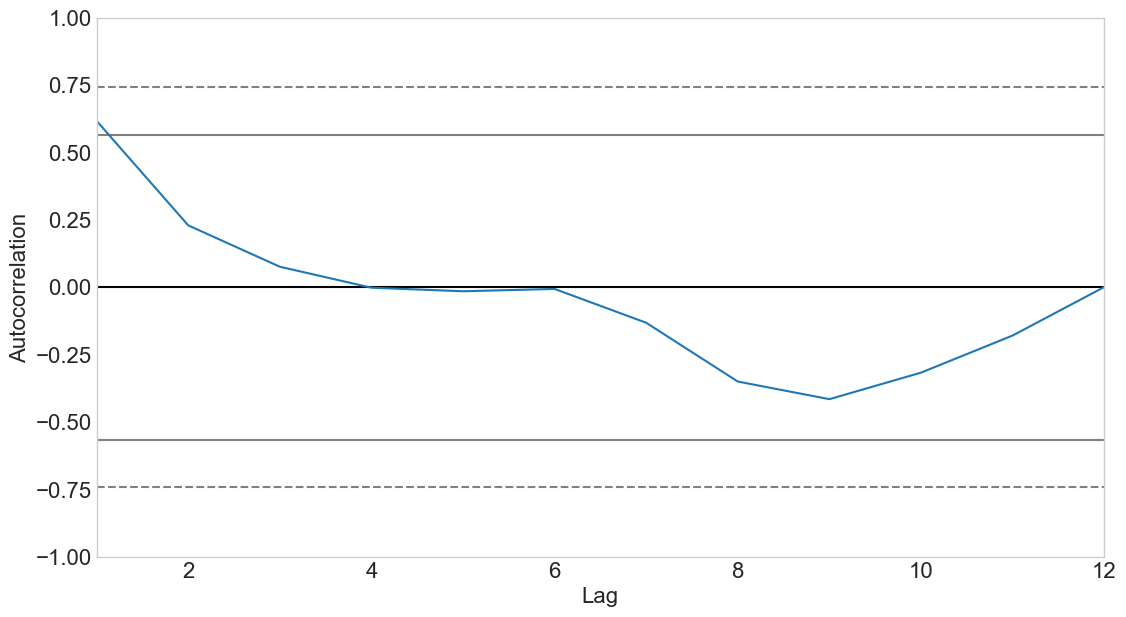

In [89]:
pd.plotting.autocorrelation_plot(train['diff'].resample('6M').mean())

### Seasonal decomposition

In [91]:
y = train['diff'].resample('6M').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()


,y,trend,seasonal,resid
2017-01-31,55.000000,NaN,12.661458,NaN
2017-07-31,70.000000,NaN,-7.515625,NaN
2018-01-31,26.833333,75.833333,-17.515625,-31.484375
2018-07-31,89.000000,100.583333,12.369792,-23.953125
2019-01-31,180.000000,125.333333,12.661458,42.005208


<AxesSubplot:>

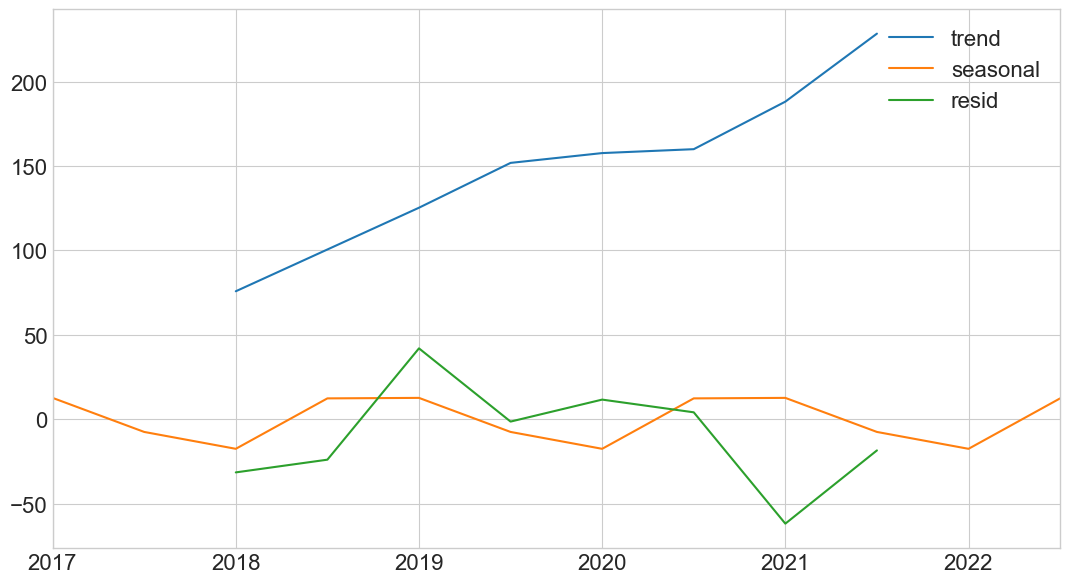

In [92]:
decomposition.iloc[:, 1:].plot()

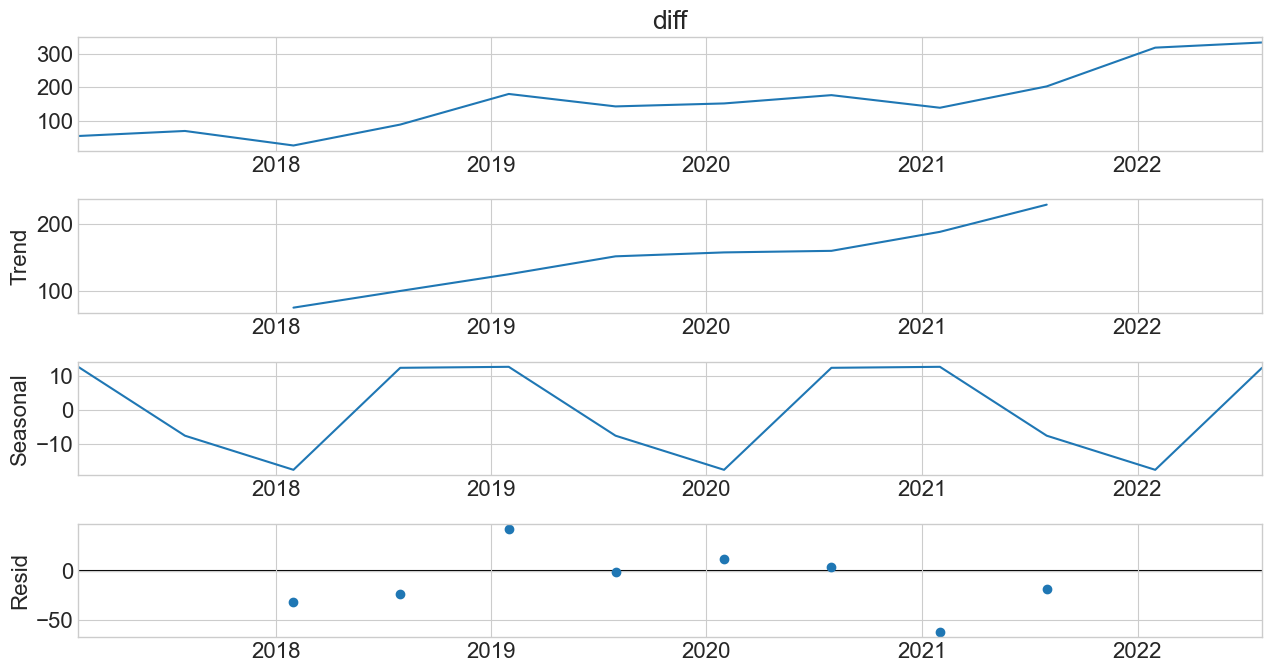

In [93]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None


In [122]:
df, train, test = wrangle_data()

In [134]:
diff_shift_1 = df['diff'].shift(1)

In [143]:
((round(df['diff'] - diff_shift_1)) / diff_shift_1).cumsum()

2017-01-01         NaN
2017-02-01   -0.090909
2017-03-01    0.429091
2017-04-01    0.481722
2017-05-01    0.081722
                ...   
2022-11-01         inf
2022-12-01         inf
2023-01-01         inf
2023-02-01         inf
2023-03-01         inf
Name: diff, Length: 75, dtype: float64

In [140]:
df['fmr_last_month'] = df['fmr'].shift(1)
df['fmr_perc_change'] = ((df['fmr'] - df['fmr_last_month'])/df['fmr'].shift(1))*100

df['diff_last_month'] = df['diff'].shift(1)
df['diff_perc_change'] = (round((df['diff'] - df['diff_last_month']), 0)/df['diff'].shift(1))*100

df['mmr_last_month'] = df['mmr'].shift(1)

df['mmr_perc_change'] = ((df['mmr'] - df['mmr_last_month']) / df['mmr'].shift(1) )* 100

<AxesSubplot:>

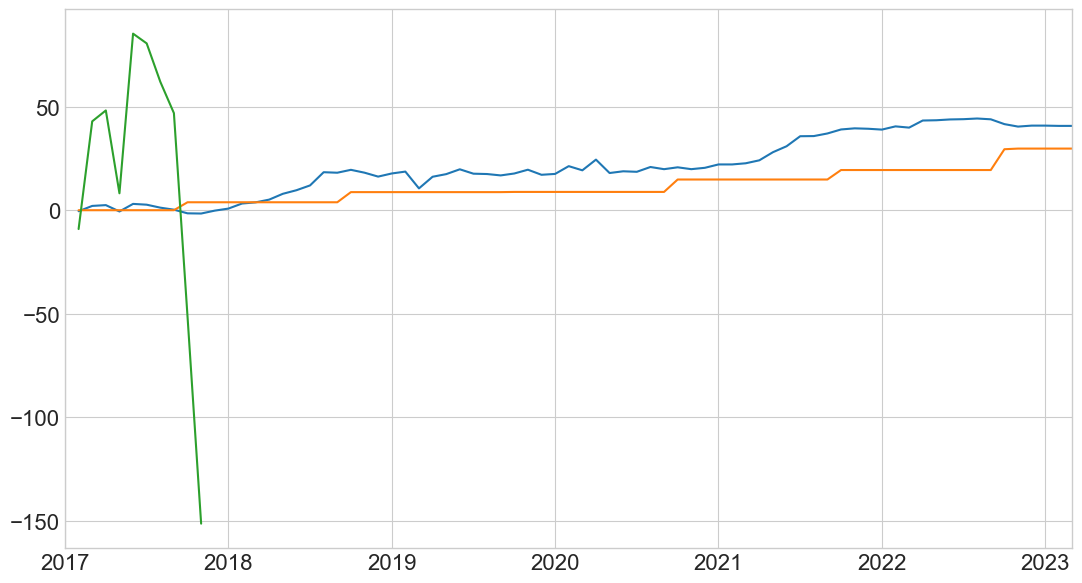

In [141]:
df['mmr_perc_change'].cumsum().plot()
df['fmr_perc_change'].cumsum().plot()
df['diff_perc_change'].cumsum().plot()